This notebook is for running cobaya. Cobaya is a MCMC sampler primarily used for cosmological analysis. Source: https://cobaya.readthedocs.io/en/latest/example.html#from-the-shell

The input of cobaya consists of a text file that usually looks like this:

A likelihood block, listing the likelihood pdf’s to be explored, here a gaussian with the mean and covariance stated.

A params block, stating the parameters that are going to be explored (or derived), their prior, the the Latex label that will be used in the plots, the reference (ref) starting point for the chains (optional), and the initial spread of the MCMC covariance matrix proposal.

A sampler block stating that we will use the mcmc sampler to explore the prior+likelihood described above, stating the maximum number of samples used, how many initial samples to ignore, and that we will sequentially refine our initial guess for a covariance matrix.

An output prefix, indicating where the products will be written and a prefix for their name.

To run this example, save the text above in a file called gaussian.yaml in a folder of your choice, and do

Below we will run the example in the Jupyter Notebook

In [22]:
from cobaya.run import run
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
from cobaya import load_samples

In [8]:
info = yaml_load_file("gaussian.yaml")
info

{'likelihood': {'gaussian_mixture': {'means': [0.2, 0],
   'covs': [[0.1, 0.05], [0.05, 0.2]],
   'derived': True}},
 'params': {'a': {'prior': {'min': -0.5, 'max': 3}, 'latex': '\\alpha'},
  'b': {'prior': {'dist': 'norm', 'loc': 0, 'scale': 1},
   'ref': 0,
   'proposal': 0.5,
   'latex': '\\beta'},
  'derived_a': {'latex': '\\alpha^\\prime'},
  'derived_b': {'latex': '\\beta^\\prime'}},
 'sampler': {'mcmc': None},
 'output': 'chains/gaussian'}

In [9]:
updated_info, sampler = run(info)

[output] Output to be read-from/written-into folder 'chains', with prefix 'gaussian'
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[mcmc] Initial point: a:0.2114405, b:0
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 14500.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2024-04-26 22:13:21 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.170
[mcmc]  - Convergence of means: R-1 = 0.134281 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.

In [10]:
updated_info

{'sampler': {'mcmc': {'burn_in': 0,
   'max_tries': '40d',
   'covmat': None,
   'covmat_params': None,
   'proposal_scale': 2.4,
   'output_every': '60s',
   'learn_every': '40d',
   'temperature': 1,
   'learn_proposal': True,
   'learn_proposal_Rminus1_max': 2.0,
   'learn_proposal_Rminus1_max_early': 30.0,
   'learn_proposal_Rminus1_min': 0.0,
   'max_samples': inf,
   'Rminus1_stop': 0.01,
   'Rminus1_cl_stop': 0.2,
   'Rminus1_cl_level': 0.95,
   'Rminus1_single_split': 4,
   'measure_speeds': True,
   'oversample_power': 0.4,
   'oversample_thin': True,
   'drag': False,
   'blocking': [(1, ['a', 'b'])],
   'callback_function': None,
   'callback_every': None,
   'seed': None,
   'check_every': None,
   'oversample': None,
   'drag_limits': None,
   'fallback_covmat_scale': 4,
   'version': '3.5'}},
 'likelihood': {'gaussian_mixture': {'means': [0.2, 0],
   'covs': [[0.1, 0.05], [0.05, 0.2]],
   'weights': None,
   'input_params_prefix': '',
   'output_params_prefix': '',
   'de

In [12]:
sampler.products()

{'sample':      weight  minuslogpost         a         b  derived_a  derived_b  \
 0       4.0      2.225184  0.183036 -0.272869  -0.053646  -0.632004   
 1       2.0      2.345569  0.224669 -0.314989   0.078011  -0.782453   
 2       6.0      2.109341  0.099203  0.102184  -0.318750   0.364743   
 3       1.0      3.229196 -0.243801  0.076648  -1.403422   0.713667   
 4       1.0      3.196281 -0.198947 -0.513541  -1.261580  -0.750766   
 ..      ...           ...       ...       ...        ...        ...   
 955     3.0      2.588540  0.540363  0.199900   1.076323   0.071040   
 956     4.0      4.481058  0.189356 -0.866387  -0.033660  -2.058338   
 957     4.0      3.363500 -0.181944 -0.596336  -1.207812  -0.969005   
 958     3.0      3.141149 -0.228778 -0.435840  -1.355917  -0.529368   
 959     1.0      3.603982 -0.261711 -0.593286  -1.460058  -0.866374   
 
      minuslogprior  minuslogprior__0      chi2  chi2__gaussian_mixture  
 0         2.208930          2.208930  0.032507   

In [17]:
# Export the results to GetDist
gd_sample = sampler.products(to_getdist=True,skip_samples=0.3)["sample"]

[root] *WARNING* outlier fraction 0.12797619047619047 


In [18]:
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)

Mean:
[ 0.20617089 -0.0372731 ]
Covariance matrix:
[[0.09696276 0.04571586]
 [0.04571586 0.17167694]]


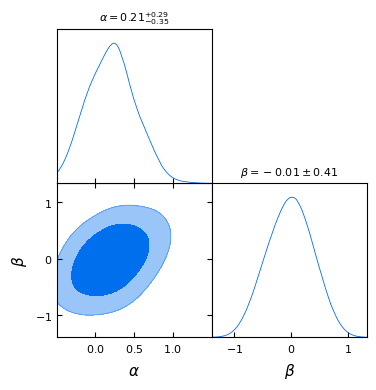

In [27]:
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True, title_limit = True)

In [26]:
gd_sample = load_samples(info["output"], to_getdist=True)

[samplecollection] Loaded 960 sample points from 'chains/gaussian.1.txt'
[root] *WARNING* outlier fraction 0.13125 
